**4. Реализуйте и протестируйте нейронную сеть на TensorFlow, исследуйте эффект настройки гиперпараметров и визуализируйте процесс обучения с помощью инструмента TensorBoard.**

Нейронные сети состоят из множества взаимосвязанных узлов — по аналогии с биологией человека их называют нейронами. Каждый нейрон получает входные данные, обрабатывает их и передает результат следующему нейрону. Эта структура напоминает работу человеческого мозга, где нейроны соединены синапсами, передающими электрические сигналы. В искусственных нейронных сетях нейроны образуют слои, а информация передаётся от одного слоя к другому.

Основные строительные блоки нейросетей — слои. Каждый слой выполняет определённые функции по обработке данные на своём уровне. В типичной нейронной сети можно выделить:
<br>- Входной слой. Он принимает данные из внешней среды — например, пиксели изображения или текстовые предложения. Эти входные данные он преобразует в формат, пригодный для дальнейшей обработки последующими слоями сети.
<br>- Выходной слой. Это последний слой, который выдаёт результаты обработки. Он преобразует информацию, полученную от скрытых слоев (о них ниже), в конечные результаты. Например, в случае распознавания изображений, выходной слой может выдавать вывод о принадлежности изображения к той или иной категории объектов.
<br>- Скрытые слои.  Скрытые слои находятся между входным и выходным слоями — и выполняют основные задачи по обработке данных. Каждый скрытый слой извлекает различные признаки из входных данных.

Активационная функция нейрона (Activation function)
В теории нейронных сетей активационной называется функция, аргументом которой является взвешенная сумма входов искусственного нейрона, а значением — выход нейрона:

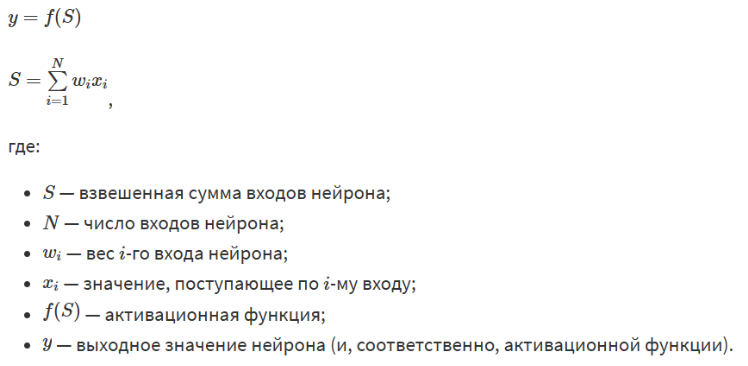

От вида и формы используемой активационный функции зависит выбор алгоритма обучения сети, а также качество ее обучения на конкретном обучающем множестве. Параметры активационной функции подбираются экспериментально в процессе обучения.

Многослойный персептрон (Multilayer Perceptron, MLP) - это подвид искусственной нейронной сети (Artificial Neural Network, ANN), состоящей из полносвязных слоёв (Dense).
 
Признаки (входные данные) подаются на первый слой. Скрытые слои (Dense(64, ...) и Dense(32, ...)) обрабатывают эти признаки с помощью нелинейных функций активации.

Каждый нейрон в слое Dense(64, ...) соединён со всеми нейронами предыдущего слоя (в данном случае — с выходами предыдущего слоя признаков после preprocessor).

Каждый нейрон в слое Dense(32, ...) соединён со всеми нейронами предыдущего слоя (Dense(64, ...)).

Наконец, выходной слой Dense(1, ...) также соединён со всеми нейронами предыдущего слоя (Dense(32, ...)). Выходной слой даёт вероятность принадлежности к одному из двух классов (бин. классификация).


c:\Users\Egor\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\Users\Egor\Documents\ML\Lab3\logs\20251120-214659
Логи будут сохранены в: C:\Users\Egor\Documents\ML\Lab3\logs\20251120-214659
Epoch 1/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8327 - loss: 0.5431 - val_accuracy: 0.8991 - val_loss: 0.2971
Epoch 2/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8891 - loss: 0.3161 - val_accuracy: 0.9129 - val_loss: 0.2463
Epoch 3/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8963 - loss: 0.2756 - val_accuracy: 0.9171 - val_loss: 0.2254
Epoch 4/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9018 - loss: 0.2490 - val_accuracy: 0.9086 - val_loss: 0.2203
Epoch 5/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9029 - loss: 0.2359 - val_accuracy: 0.9223 - val_loss: 0.2025
Epoch 6/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9045 - loss: 0.2268 - val_accuracy: 0.9134 - val_loss: 0.2047
Epoch 7/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9117 - loss: 0.2140 - val_accuracy: 

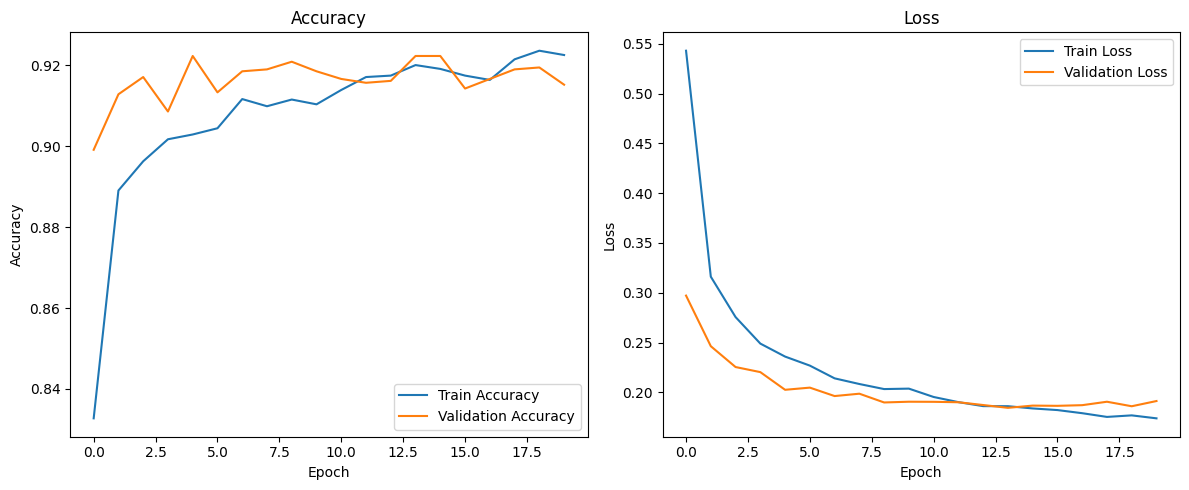

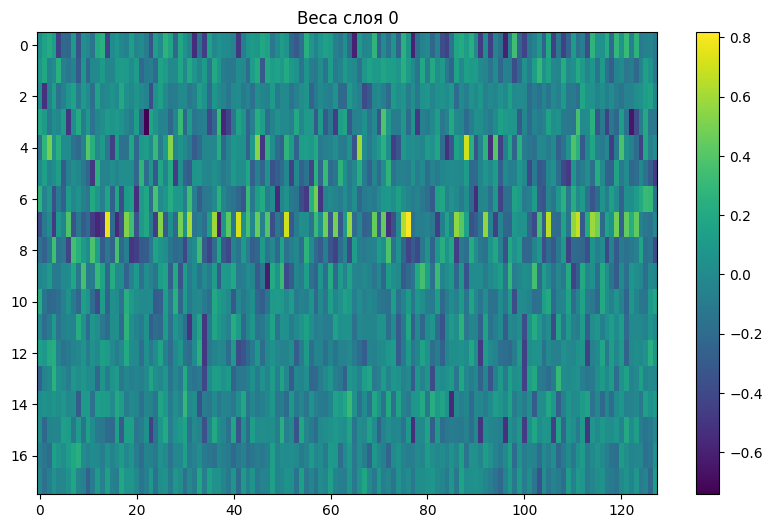

Test accuracy: 0.9027


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
import numpy as np

# Подготовка данных
def load_data():
    data = pd.read_csv('C:\\Users\\Egor\\Documents\\ML\\Lab3\\weather_classification_data.csv')

    # Разделение на признаки и целевую переменную
    X = data.drop(columns=['Weather Type'])
    y = data['Weather Type']

    # Определение числовых и категориальных признаков
    numeric_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                        'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
    categorical_features = ['Cloud Cover', 'Season', 'Location']

    # Преобразование данных
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(), categorical_features)
        ])

    X_processed = preprocessor.fit_transform(X)

    # Кодирование целевой переменной
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    y_categorical = to_categorical(y_encoded)

    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y_categorical, test_size=0.2, random_state=42)

    return X_train, y_train, X_test, y_test, le.classes_

# Создание модели
def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def setup_tensorboard(log_dir="C:\\Users\\Egor\\Documents\\ML\\Lab3\\logs"):
    log_dir = os.path.join(log_dir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    print(log_dir)
    os.makedirs(log_dir, exist_ok=True)
    print(f"Логи будут сохранены в: {os.path.abspath(log_dir)}")
    return tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Обучение модели
def train_model(model, x_train, y_train, batch_size=32, epochs=10, callbacks=None):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=callbacks, verbose=1)
    return history

# Тестирование модели
def evaluate_model(model, x_test, y_test):
    return model.evaluate(x_test, y_test, verbose=2)

def plot_model_architecture(model, filename='model_architecture.png'):
    plot_model(model, to_file=filename, show_shapes=True, show_layer_names=True)
    print(f"Структура модели сохранена в {filename}")

def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # График точности
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # График функции потерь
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_predictions(model, X_test, y_test, label_encoder, num_samples=5):
    predictions = model.predict(X_test[:num_samples])
    plt.figure(figsize=(15, 3))

    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        true_label = y_test[i].argmax()
        pred_label = predictions[i].argmax()
        color = 'green' if true_label == pred_label else 'red'

        # Выводим текстовые данные
        plt.text(0.5, 0.5, f"True: {label_encoder[true_label]}\nPred: {label_encoder[pred_label]}",
                 horizontalalignment='center', verticalalignment='center', color=color, fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def plot_weights(model):
    # Проверим, есть ли веса у первого Dense слоя
    for i, layer in enumerate(model.layers):
        if len(layer.get_weights()) > 0:
            weights = layer.get_weights()[0]
            plt.figure(figsize=(10, 6))
            plt.imshow(weights, cmap='viridis', aspect='auto')
            plt.colorbar()
            plt.title(f'Веса слоя {i}')
            plt.show()
            break


X_train, y_train, X_test, y_test, class_names = load_data()

model = build_model((X_train.shape[1],), y_train.shape[1])

tensorboard_callback = setup_tensorboard()
history = train_model(model, X_train, y_train, batch_size=32, epochs=20, callbacks=[tensorboard_callback])

test_loss, test_acc = evaluate_model(model, X_test, y_test)

plot_model_architecture(model)
plot_training_history(history)
#plot_predictions(model, X_test, y_test, class_names, num_samples=5)
plot_weights(model)

print(f"Test accuracy: {test_acc:.4f}")



На графике точности видно, что как обучающая, так и валидационная точность быстро растут в первые несколько эпох и затем стабилизируются на уровне около 0.92. Это указывает на то, что модель эффективно обучается и хорошо генерализует данные, так как разница между точностью на обучающей и валидационной выборках минимальна. Быстрое достижение высокой точности говорит о том, что выбранная архитектура и параметры обучения подходят для данной задачи.

На графике функции потерь видно, что как обучающая, так и валидационная функции потерь быстро снижаются в первые эпохи и затем стабилизируются на низком уровне. Это также подтверждает, что модель хорошо обучается и не страдает от переобучения, так как значения потерь на обучающей и валидационной выборках близки друг к другу.

Тепловая карта весов первого слоя показывает распределение значений весов после обучения. На карте видно, что веса распределены неравномерно, с наличием как положительных, так и отрицательных значений, что является нормальным для обученной нейронной сети. Яркие пятна на карте могут указывать на нейроны, которые имеют более значимые веса и, возможно, играют более важную роль в процессе обучения. Такое распределение весов свидетельствует о том, что модель научилась выделять важные признаки из входных данных.

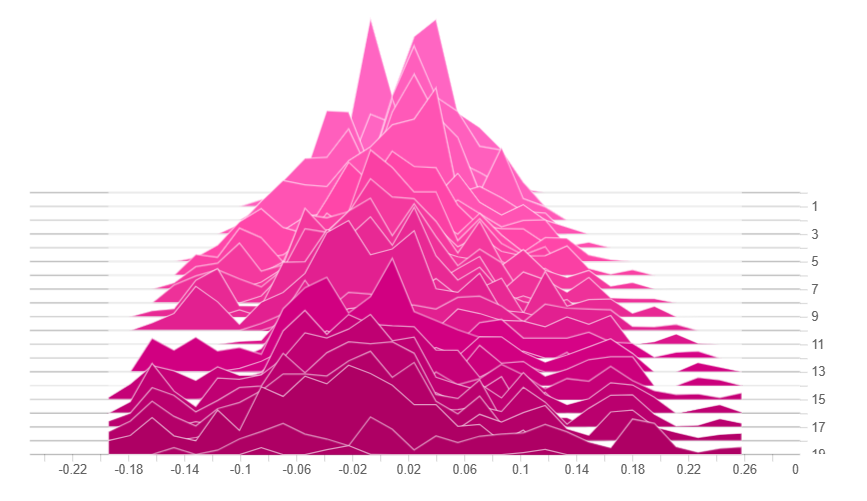

График отображает распределение смещений (bias) нейронной сети. Такая визуализация позволяет увидеть, как распределяются значения смещений в одном из слоёв модели после обучения.

Смещения в нейронной сети — это параметры, которые добавляются к взвешенной сумме входов каждого нейрона, чтобы сдвинуть функцию активации влево или вправо. На графике видно, что большинство значений смещений сосредоточены около нуля, что является типичным для хорошо обученной модели. Это может свидетельствовать о том, что модель не имеет сильных систематических ошибок, связанных с неправильной инициализацией или обучением.

**Постройте нейронную сеть для классификации на TensorFlow. Организуйте 5-кратную кросс-валидацию для надежной оценки качества.**

5-кратная кросс-валидация для оценки качества

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Кросс-валидация
def cross_validate_model(X, y, n_splits=5):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    for train_idx, val_idx in kfold.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = build_model((X_train.shape[1],), y_train.shape[1])
        model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
        _, accuracy = model.evaluate(X_val, y_val, verbose=0)
        accuracies.append(accuracy)

    return accuracies

data = pd.read_csv('C:\\Users\\Egor\\Documents\\ML\\Lab3\\weather_classification_data.csv')

X = data.drop(columns=['Weather Type'])
y = data['Weather Type']

numeric_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                        'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
categorical_features = ['Cloud Cover', 'Season', 'Location']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = tf.keras.utils.to_categorical(y_encoded)

accuracies = cross_validate_model(X_processed, y_categorical, n_splits=5)

print(f"Точности на каждом фолде: {accuracies}")
print(f"Средняя точность: {np.mean(accuracies):.4f}")
print(f"Стандартное отклонение точности: {np.std(accuracies):.4f}")


c:\Users\Egor\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Точности на каждом фолде: [0.9056817889213562, 0.9098485112190247, 0.904924213886261, 0.9215909242630005, 0.9151515364646912]
Средняя точность: 0.9114
Стандартное отклонение точности: 0.0062


Модель обладает достаточно высокой точностью, как в целом, так и её фолды по отдельности

**Методом Grid Search с кросс-валидацией подберите оптимальную скорость обучения (3 различных значения) и архитектуру сети (3 варианта).**

c:\Users\Egor\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Egor\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Egor\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in th

Лучшая точность: 0.9105 с параметрами {'model__learning_rate': 0.001, 'model__num_units': 256}


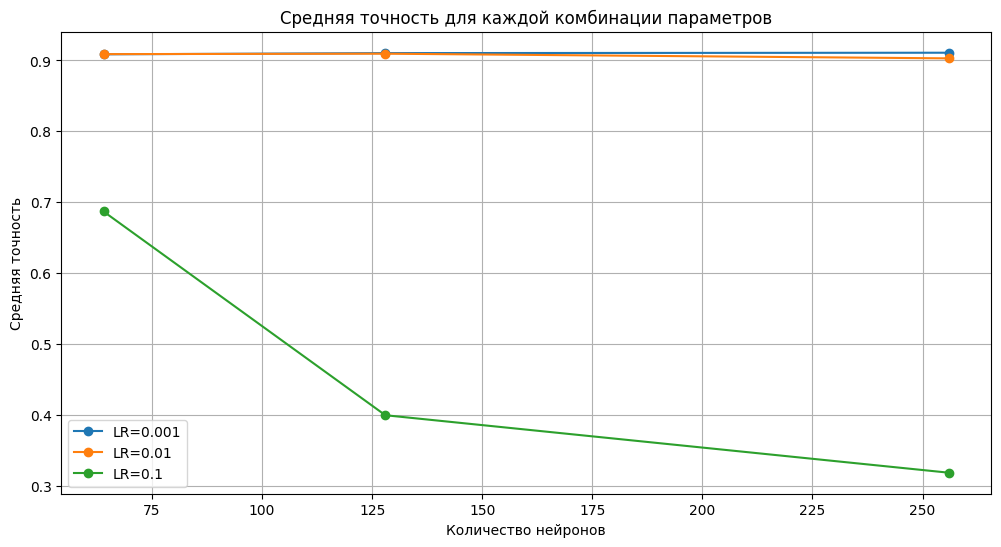

In [3]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(learning_rate=0.001, num_units=128):
    model = Sequential()
    model.add(Dense(num_units, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(num_units // 2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=0)

# Определение параметров для поиска
param_grid = {
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__num_units': [64, 128, 256]
}

# Поиск оптимальных параметров
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_result = grid.fit(X_processed, y_encoded)

print(f"Лучшая точность: {grid_result.best_score_:.4f} с параметрами {grid_result.best_params_}")

# Преобразование результатов в DataFrame для удобства анализа
results = pd.DataFrame(grid_result.cv_results_)

# Построение графиков
plt.figure(figsize=(12, 6))

# График средней точности для каждой комбинации параметров
for i, params in enumerate(param_grid['model__learning_rate']):
    subset = results[results['param_model__learning_rate'] == params]
    plt.plot(subset['param_model__num_units'], subset['mean_test_score'], marker='o', label=f'LR={params}')

plt.title('Средняя точность для каждой комбинации параметров')
plt.xlabel('Количество нейронов')
plt.ylabel('Средняя точность')
plt.legend()
plt.grid(True)
plt.show()

Оранжевая линия, соответствующая скорости обучения 0.01, показывает стабильно высокую точность около 0.9 для всех значений количества нейронов. Это указывает на то, что данная скорость обучения позволяет модели хорошо обучаться независимо от количества нейронов в слоях. Такое поведение может свидетельствовать о том, что скорость обучения 0.01 является оптимальной для данной задачи, так как модель демонстрирует высокую точность и стабильность.

Синяя линия, соответствующая скорости обучения 0.001, практически сливается с оранжевой, что указывает на схожие результаты точности. Это может означать, что обе скорости обучения (0.001 и 0.01) обеспечивают примерно одинаковую точность модели. Однако, поскольку оранжевая линия более заметна и стабильна, можно предположить, что скорость обучения 0.01 всё же немного предпочтительнее, так как она может обеспечивать более быструю сходимость модели.

Зелёная линия, соответствующая скорости обучения 0.1, демонстрирует значительное падение точности с увеличением количества нейронов. При малом количестве нейронов точность составляет около 0.7, но с увеличением их числа точность резко падает до значений ниже 0.4. Это может указывать на то, что слишком высокая скорость обучения в сочетании с большим количеством нейронов приводит к нестабильному обучению и, возможно, к переобучению или плохой сходимости модели.

Таким образом, оптимальной скоростью обучения для данной задачи является 0.01, так как она обеспечивает стабильно высокую точность независимо от количества нейронов. Скорость обучения 0.001 также показывает хорошие результаты, но может требовать большего времени для обучения модели. Высокая скорость обучения 0.1 не подходит из-за значительного падения точности при увеличении количества нейронов.

**Настройте TensorBoard для отслеживания accuracy / loss на каждом фолде.**

In [4]:

def cross_validate_with_tensorboard(X, y, n_splits=5, learning_rates=[0.001, 0.01, 0.1], num_units_list=[64, 128, 256]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X)):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        for learning_rate in learning_rates:
            for num_units in num_units_list:
                log_dir = os.path.join("C:\\Users\\Egor\\Documents\\ML\\Lab3\\logs", f"fold_{fold}", f"lr_{learning_rate}_units_{num_units}",
                                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
                os.makedirs(log_dir, exist_ok=True)

                tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

                model = create_model(learning_rate=learning_rate, num_units=num_units)

                model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val),
                          callbacks=[tensorboard_callback], verbose=0)

cross_validate_with_tensorboard(X_processed, y_encoded, n_splits=5, learning_rates=[0.001, 0.01, 0.1], num_units_list=[64, 128, 256])


c:\Users\Egor\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


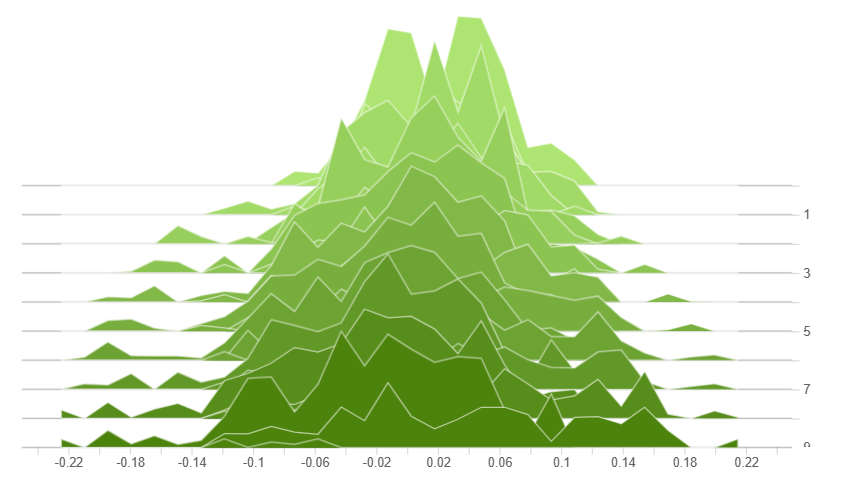

Learning rate = 0.001, units = 256, фолд = 0

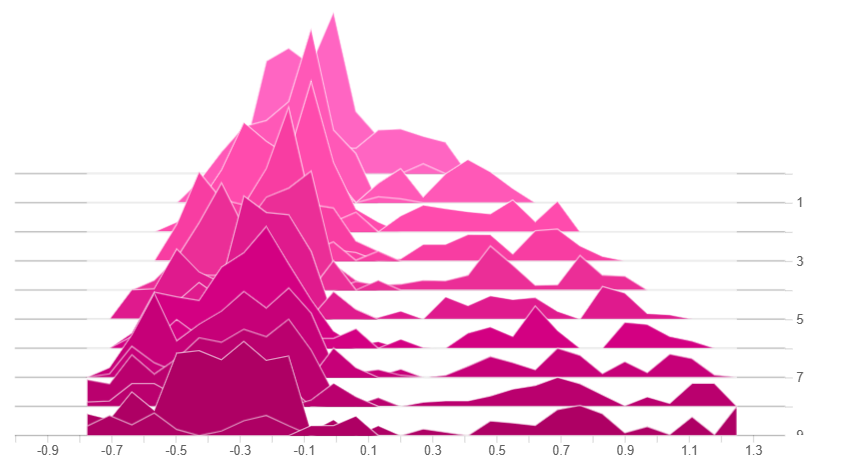

Learning rate = 0.01, units = 64, фолд = 0

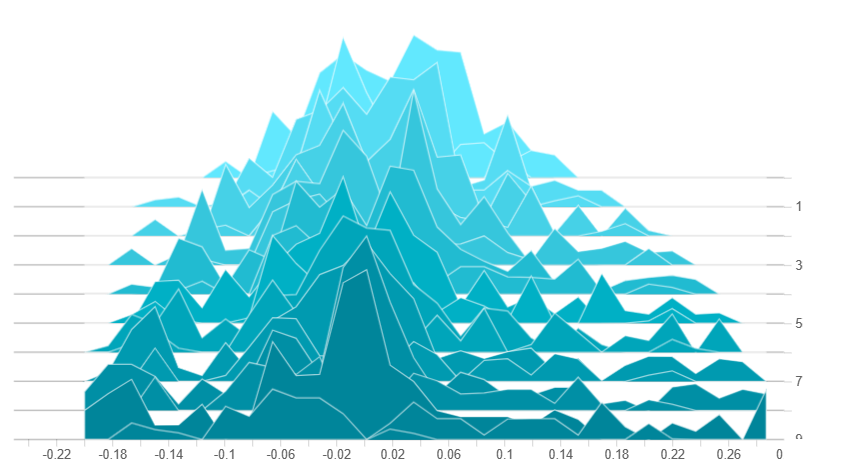

Learning rate = 0.001, units = 64, фолд = 1

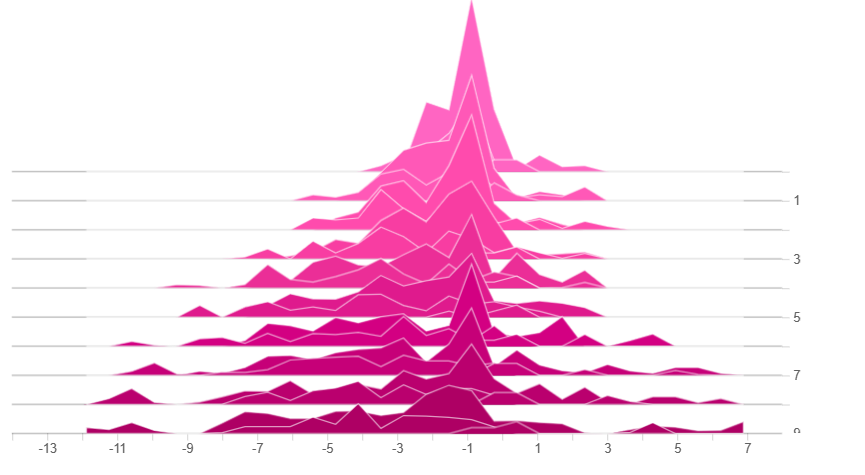

Learning rate = 0.1, units = 64, фолд = 2

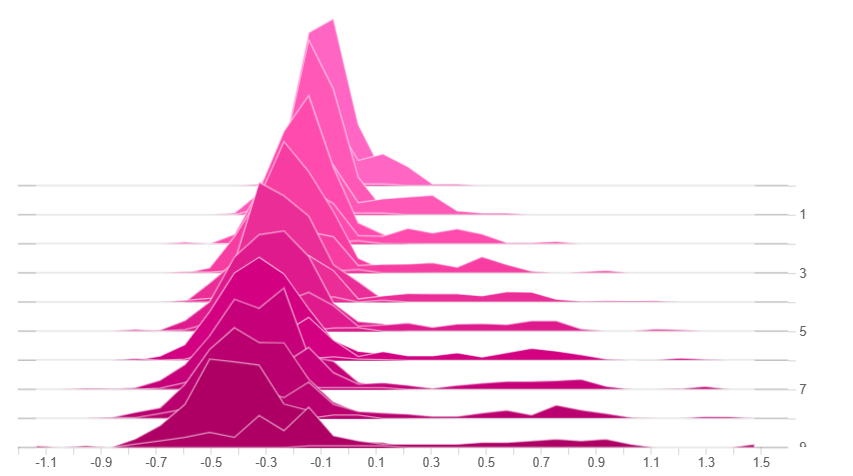

Learning rate = 0.01, units = 256, фолд = 4

На представленных графиках показаны распределения активаций нейронов в различных слоях нейронной сети для разных конфигураций гиперпараметров: скорости обучения (learning rate) и количества нейронов (units) в слоях. Каждый график соответствует определённой комбинации этих параметров и фолду кросс-валидации.

На первом графике (learning rate = 0.001, units = 256, фолд = 0) распределение активаций более узкое и сосредоточено в диапазоне от -0.22 до 0.22. Это может свидетельствовать о более сдержанной активации нейронов, что может быть следствием меньшей скорости обучения и большего количества нейронов, что позволяет модели более плавно обучаться.

На втором графике (learning rate = 0.01, units = 64, фолд = 0) распределение активаций сосредоточено в основном в диапазоне от -0.9 до 0.5. Это может указывать на то, что нейроны в слое активируются в основном в этом диапазоне значений, что является нормальным для нейронной сети с функцией активации ReLU, где отрицательные значения обнуляются.

Третий график (learning rate = 0.001, units = 64, фолд = 1) показывает распределение активаций, схожее с первым графиком, но с меньшей амплитудой. Это может быть связано с влиянием конкретного фолда данных на обучение модели.

Четвёртый график (learning rate = 0.1, units = 64, фолд = 2) демонстрирует более широкое распределение активаций, что может быть следствием высокой скорости обучения. Это может указывать на менее стабильное обучение, так как большая скорость обучения может приводить к резким изменениям весов и, как следствие, к менее устойчивым активациям.

На пятом графике (learning rate = 0.01, units = 256, фолд = 4) распределение активаций сосредоточено в диапазоне от -1.1 до 1.5. Это может быть следствием использования большего количества нейронов, что позволяет модели более гибко адаптироваться к данным, но также может указывать на потенциальное переобучение.

**Сравнения различных конфигураций модели. Сравните финальную accuracy с baseline-моделью и проанализируйте эффект от настройки параметров.**

Epoch 1/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8220 - loss: 0.5498 - val_accuracy: 0.9067 - val_loss: 0.2833
Epoch 2/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8900 - loss: 0.3159 - val_accuracy: 0.9186 - val_loss: 0.2349
Epoch 3/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8952 - loss: 0.2679 - val_accuracy: 0.9186 - val_loss: 0.2147
Epoch 4/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9025 - loss: 0.2408 - val_accuracy: 0.9134 - val_loss: 0.2082
Epoch 5/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9066 - loss: 0.2268 - val_accuracy: 0.9143 - val_loss: 0.2026
Epoch 6/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9086 - loss: 0.2177 - val_accuracy: 0.9176 - val_loss: 0.1961
Epoch 7/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9042 - loss: 0.2164 - val_accuracy: 0.9186 - val_loss: 0.1934
Epoch 8/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9112 - loss: 0.2037 - val_accuracy: 0.

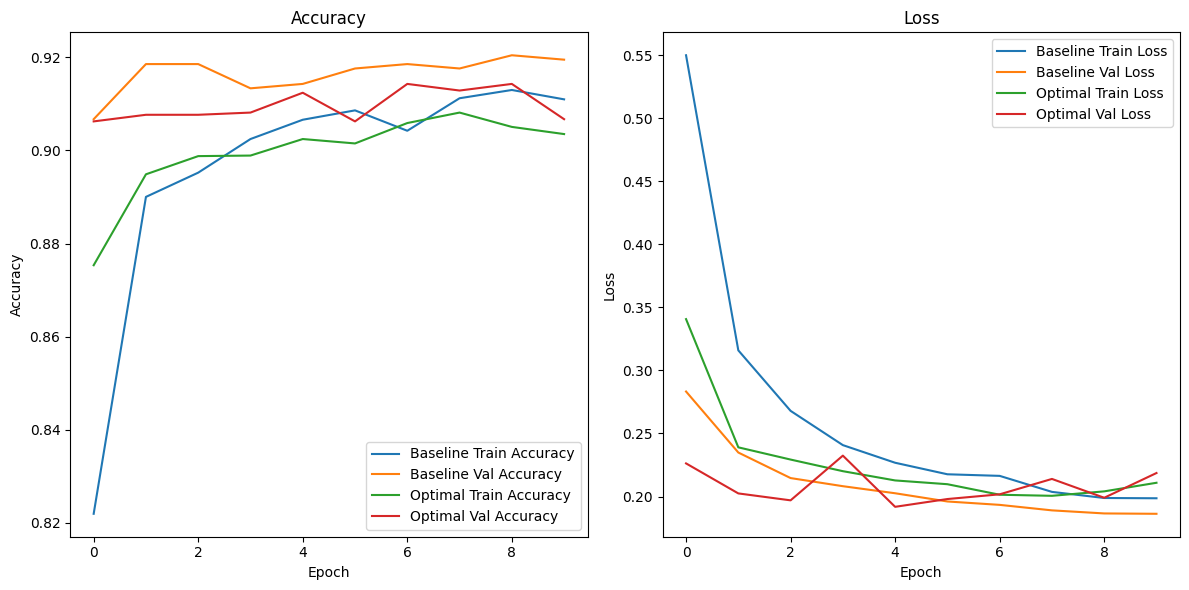

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

def create_baseline_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Обучение baseline-модели
baseline_model = create_baseline_model((X_train.shape[1],))
baseline_history = baseline_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Оценка baseline-модели
baseline_loss, baseline_accuracy = baseline_model.evaluate(X_test, y_test, verbose=0)
print(f"Baseline Test Accuracy: {baseline_accuracy:.4f}")

# Обучение модели с оптимальными параметрами
optimal_model = create_model(learning_rate=0.01, num_units=256)
optimal_history = optimal_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Оценка модели с оптимальными параметрами
optimal_loss, optimal_accuracy = optimal_model.evaluate(X_test, y_test, verbose=0)
print(f"Optimal Test Accuracy: {optimal_accuracy:.4f}")

# Сравнение результатов
print("\nСравнение результатов:")
print(f"Baseline Test Accuracy: {baseline_accuracy:.4f}")
print(f"Optimal Test Accuracy: {optimal_accuracy:.4f}")
print(f"Улучшение точности: {optimal_accuracy - baseline_accuracy:.4f}")

# Построение графиков
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# График точности
plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['accuracy'], label='Baseline Train Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Val Accuracy')
plt.plot(optimal_history.history['accuracy'], label='Optimal Train Accuracy')
plt.plot(optimal_history.history['val_accuracy'], label='Optimal Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# График функции потерь
plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['loss'], label='Baseline Train Loss')
plt.plot(baseline_history.history['val_loss'], label='Baseline Val Loss')
plt.plot(optimal_history.history['loss'], label='Optimal Train Loss')
plt.plot(optimal_history.history['val_loss'], label='Optimal Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

На графике точности (Accuracy) видно, что зелёная линия, представляющая точность обучения оптимизированной модели, действительно в большинстве случаев находится выше синей линии, которая соответствует точности обучения baseline-модели. Это указывает на то, что оптимизированная модель лучше обучается на тренировочных данных.
Однако, если посмотреть на линии валидационной точности (красная для оптимизированной модели и оранжевая для baseline-модели), можно заметить, что они часто пересекаются или находятся близко друг к другу. Это может означать, что улучшение точности на обучающей выборке не всегда приводит к такому же улучшению на валидационной выборке.

На графике функции потерь (Loss) видно, что потери на обучающей выборке (синяя и зелёная линии) снижаются для обеих моделей, но оптимизированная модель (зелёная линия) показывает более быстрое снижение потерь в начале обучения. Однако, потери на валидационной выборке (оранжевая и красная линии) для обеих моделей также близки друг к другу, что может указывать на схожую способность генерализации.
Таким образом, хотя оптимизированная модель и показывает лучшие результаты на обучающей выборке, разница в точности на валидационной выборке не столь значительна. Это может означать, что улучшения в архитектуре или параметрах модели не приводят к значительному улучшению её способности обобщать данные.